In [1]:

#### Import required dependencies
import pandas as pd
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plot
from scipy.stats import linregress
from scipy import stats

#### Source of dataset
# https://www.kaggle.com/datasets/thedevastator/uncovering-trends-in-health-outcomes-and-socioec/data?select=avg-household-size.csv


In [2]:

#### Read in the household sizes datasets
household_size_data = pd.read_csv("Resources/avg-household-size.csv", index_col='geography')
#household_size_data.info()
household_size_data.head()


,index,statefips,countyfips,avghouseholdsize
geography,,,,
"Aleutians East Borough, Alaska",0,2,13,2.43
"Aleutians West Census Area, Alaska",1,2,16,3.59
"Anchorage Municipality, Alaska",2,2,20,2.77
"Bethel Census Area, Alaska",3,2,50,3.86
"Bristol Bay Borough, Alaska",4,2,60,2.50


In [3]:

#### Read in the cancer dataset
cancer_data = pd.read_csv("Resources/cancer_reg.csv", index_col='geography')
#cancer_data.info()
cancer_data.head()


,index,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
geography,,,,,,,,,,,,,,,,,,,,,
"Kitsap County, Washington",0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
"Kittitas County, Washington",1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
"Klickitat County, Washington",2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
"Lewis County, Washington",3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
"Lincoln County, Washington",4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [4]:

#### Combine the dataframes on geography
combined_data = pd.merge(household_size_data, cancer_data, on="geography", how="outer")
combined_data.info()
combined_data.head()


<class 'pandas.core.frame.DataFrame'>
Index: 3220 entries, Aleutians East Borough, Alaska to Weston County, Wyoming
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index_x                  3220 non-null   int64  
 1   statefips                3220 non-null   int64  
 2   countyfips               3220 non-null   int64  
 3   avghouseholdsize         3220 non-null   float64
 4   index_y                  3047 non-null   float64
 5   avganncount              3047 non-null   float64
 6   avgdeathsperyear         3047 non-null   float64
 7   target_deathrate         3047 non-null   float64
 8   incidencerate            3047 non-null   float64
 9   medincome                3047 non-null   float64
 10  popest2015               3047 non-null   float64
 11  povertypercent           3047 non-null   float64
 12  studypercap              3047 non-null   float64
 13  binnedinc                3047 non-nu

,index_x,statefips,countyfips,avghouseholdsize,index_y,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
geography,,,,,,,,,,,,,,,,,,,,,
"Aleutians East Borough, Alaska",0,2,13,2.43,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Aleutians West Census Area, Alaska",1,2,16,3.59,2713.0,8.0,3.0,203.3,201.3,68387.0,...,60.4,58.3,11.2,6.2,31.562280,4.732583,37.156932,5.295567,42.882250,4.391052
"Anchorage Municipality, Alaska",2,2,20,2.77,2714.0,1085.0,352.0,167.5,453.3,75200.0,...,NaN,45.9,24.5,12.9,64.944652,5.854427,8.800530,1.747201,48.361303,5.994294
"Bethel Census Area, Alaska",3,2,50,3.86,2715.0,37.0,20.0,218.8,338.2,45808.0,...,25.8,25.1,47.3,36.1,12.016202,0.798830,1.175743,0.343159,45.521390,9.156280
"Bristol Bay Borough, Alaska",4,2,60,2.50,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:

#### Description of columns
# statefips: State identification number. (Integer)
# countyfips: County identification number. (Integer)
# avghouseholdsize: Average size of households in the county. (Float)
# geography: Location name. (String)
# geography: Location name. (String)
# avganncount: Average annual count of cancer cases in the county. (Numeric)
# avgdeathsperyear: Average number of deaths per year in the county. (Numeric)
# target_deathrate: Number of deaths per 100k individuals in each county. (Numeric)
# medincome: Median household income for the county. (Numeric)
# popest2015: Population estimates for 2015. (Numeric)
# povertypercent: Percentage of people living in poverty. (Numeric)
# studypercap: Number of clinical trials per capita in the given county. (Numeric)
# binnedinc: Binned income for each county. (Categorical)
# medianage: Median age of the population in the county. (Numeric)
# medianagemale: Median age of the male population in the county. (Numeric)
# medianagefemale: Median age of the female population in the county. (Numeric)
# percentmarried: Percentage of people who are married in the county. (Numeric)
# pctnohs18_24: Percentage of people aged 18-24 who did not graduate high school. (Numeric)
# pcths18_24: Percentage of people aged 18-24 who graduated high school. (Numeric)
# pctsomecol18_24: Percentage of people aged 18-24 who attended some college. (Numeric)
# pctbachdeg18_24: Percentage of people aged 18-24 who have a bachelor's degree. (Numeric)
# pcths25_over: Percentage of people aged 25 and over who graduated high school. (Numeric)
# pctbachdeg25_over: Percentage of people aged 25 and over who have a bachelor's degree. (Numeric)
# pctemployed16_over: Percentage of people aged 16 and over who are employed. (Numeric)
# pctunemployed16_over: Percentage of people aged 16 and over who are unemployed. (Numeric)
# pctprivatecoverage: Percentage of people with private health insuranc

#### Drop the NA values
combined_data = combined_data.dropna()
combined_data.info()

#### Retain only data we are interested in
#focused_data = combined_data.drop(columns=['index_x', 'index_y', 'medincome', 'povertypercent', 'binnedinc', 'percentmarried',
#                                            'pctnohs18_24', 'pcths18_24', 'pctsomecol18_24', 'pctbachdeg18_24', 'pcths25_over',
#                                           'pctbachdeg25_over', 'pctemployed16_over', 'pctunemployed16_over', 'pctprivatecoverage',
#                                           'pctprivatecoveragealone', 'pctempprivcoverage', 'pctpubliccoverage', 'pctpubliccoveragealone',
#                                            'pctwhite', 'pctblack', 'pctasian', 'pctotherrace', 'pctmarriedhouseholds', 'birthrate'])

#### Better way to do this -> transfer the columns that you do want to a new df
focused_data = combined_data[['avganncount', 'popest2015', 'studypercap', 'medianage', 'medianagemale', 'medianagefemale', 'target_deathrate']]

#### check columns and data
focused_data.info() 
focused_data


<class 'pandas.core.frame.DataFrame'>
Index: 591 entries, Haines Borough, Alaska to Sheridan County, Wyoming
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index_x                  591 non-null    int64  
 1   statefips                591 non-null    int64  
 2   countyfips               591 non-null    int64  
 3   avghouseholdsize         591 non-null    float64
 4   index_y                  591 non-null    float64
 5   avganncount              591 non-null    float64
 6   avgdeathsperyear         591 non-null    float64
 7   target_deathrate         591 non-null    float64
 8   incidencerate            591 non-null    float64
 9   medincome                591 non-null    float64
 10  popest2015               591 non-null    float64
 11  povertypercent           591 non-null    float64
 12  studypercap              591 non-null    float64
 13  binnedinc                591 non-null    ob

,avganncount,popest2015,studypercap,medianage,medianagemale,medianagefemale,target_deathrate
geography,,,,,,,
"Haines Borough, Alaska",13.0,2534.0,0.000000,45.5,45.6,45.3,126.3
"Kenai Peninsula Borough, Alaska",266.0,58059.0,0.000000,40.5,40.0,41.1,168.1
"Ketchikan Gateway Borough, Alaska",63.0,13709.0,0.000000,38.7,37.9,39.4,205.0
"Yukon-Koyukuk Census Area, Alaska",27.0,5533.0,0.000000,35.0,35.4,34.0,206.6
"Cherokee County, Alabama",158.0,25859.0,0.000000,45.4,44.6,46.2,191.2
...,...,...,...,...,...,...,...
"Putnam County, West Virginia",328.0,56848.0,211.089220,41.0,40.4,41.6,171.5
"Webster County, West Virginia",65.0,8755.0,114.220445,46.3,45.5,46.6,259.5
"Hot Springs County, Wyoming",37.0,4741.0,0.000000,49.6,48.1,50.1,163.0


In [6]:

#### Define a function to remove outliers
def get_outlier_bounds(input):
    Q1 = input.quantile(0.25)
    Q3 = input.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return [lower_bound, upper_bound]


In [7]:

#### Remove outliers from all relevant columns
focused_data_clean = focused_data
cols = ['avganncount', 'popest2015', 'medianage', 'medianagemale', 'medianagefemale', 'target_deathrate']

#### Loop over columns, apply to all
for x in cols:
    bounds = get_outlier_bounds(focused_data_clean[x])
    focused_data_clean = focused_data_clean[(focused_data_clean[x] >= bounds[0]) & (focused_data_clean[x] <= bounds[1])]

#### Check the cleaned data
focused_data_clean


,avganncount,popest2015,studypercap,medianage,medianagemale,medianagefemale,target_deathrate
geography,,,,,,,
"Haines Borough, Alaska",13.0,2534.0,0.000000,45.5,45.6,45.3,126.3
"Kenai Peninsula Borough, Alaska",266.0,58059.0,0.000000,40.5,40.0,41.1,168.1
"Ketchikan Gateway Borough, Alaska",63.0,13709.0,0.000000,38.7,37.9,39.4,205.0
"Yukon-Koyukuk Census Area, Alaska",27.0,5533.0,0.000000,35.0,35.4,34.0,206.6
"Cherokee County, Alabama",158.0,25859.0,0.000000,45.4,44.6,46.2,191.2
...,...,...,...,...,...,...,...
"Preston County, West Virginia",183.0,33940.0,0.000000,42.3,40.4,43.5,169.8
"Putnam County, West Virginia",328.0,56848.0,211.089220,41.0,40.4,41.6,171.5
"Hot Springs County, Wyoming",37.0,4741.0,0.000000,49.6,48.1,50.1,163.0


In [8]:

#### Check and clean the important data
#focused_data['medianage'].describe()
#focused_data['medianagemale'].describe()
#focused_data['medianagefemale'].describe()

#### Remove outliers from median age
#Q1 = focused_data['medianage'].quantile(0.25)
#Q3 = focused_data['medianage'].quantile(0.75)
#IQR = Q3 - Q1
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR

# Step 4: Filter out the outliers
#focused_data_clean = focused_data[(focused_data['medianage'] >= lower_bound) & (focused_data['medianage'] <= upper_bound)]
#focused_data_clean
#focused_data_clean['medianage'].describe()

#### Requires additional filtering
# remove and rows where median age > 90
#above90 = 90
#focused_data_clean = focused_data_clean[(focused_data['medianage'] <= above90)]
#focused_data_clean = focused_data_clean[(focused_data['medianagemale'] <= above90)]
#focused_data_clean = focused_data_clean[(focused_data['medianagefemale'] <= above90)]
#focused_data_clean['medianagemale'].describe()


In [9]:

#### Incidence in total counts. Need to calculate per person
focused_data_clean['incidence'] = (focused_data_clean['avganncount'] / focused_data_clean['popest2015'])*100
focused_data_clean['incidence'].describe()
#focused_data_clean

#### Check the data after clearing outliers
focused_data_clean['avganncount'].describe()
focused_data_clean['popest2015'].describe()


count       387.000000
mean      30894.640827
std       23393.518595
min        1423.000000
25%       13343.500000
50%       22872.000000
75%       41038.500000
max      106869.000000
Name: popest2015, dtype: float64

In [10]:

#### Check the correlations between current columns of interest
# focused_data.corr()
focused_data_clean[['incidence', 'medianage', 'medianagemale', 'medianagefemale', 'target_deathrate']].corr()


,incidence,medianage,medianagemale,medianagefemale,target_deathrate
incidence,1.000000,0.634122,0.593665,0.629833,0.273268
medianage,0.634122,1.000000,0.968065,0.961908,-0.079973
medianagemale,0.593665,0.968065,1.000000,0.879464,-0.097863
medianagefemale,0.629833,0.961908,0.879464,1.000000,-0.058794
target_deathrate,0.273268,-0.079973,-0.097863,-0.058794,1.000000


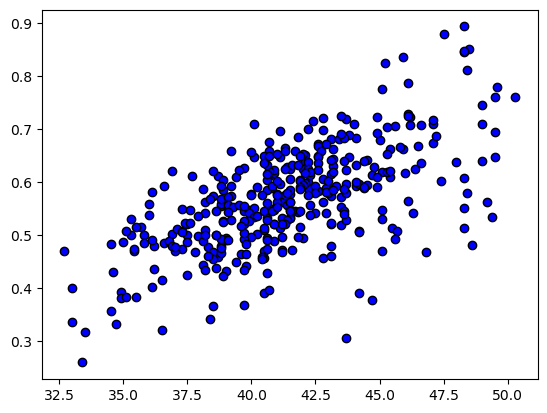

<Figure size 20000x1000 with 0 Axes>

In [11]:

#### Make a test plot to take a quick look at the data
plot.scatter(focused_data_clean['medianage'], focused_data_clean['incidence'], marker="o", facecolors="blue", edgecolors="black")
plot.figure(figsize=(200, 10))
plot.show()


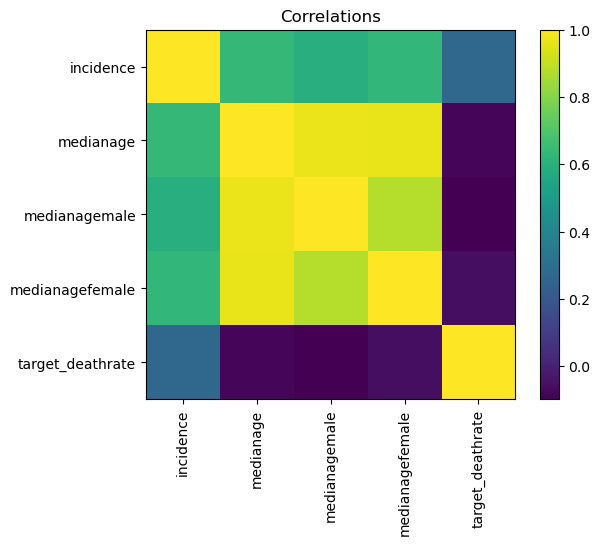

In [12]:

#### Generate a heatmap for correlations
import matplotlib.pyplot as plt
import numpy as np

# Input data and generate heatmap
data = focused_data_clean[['incidence', 'medianage', 'medianagemale', 'medianagefemale', 'target_deathrate']].corr()
plt.imshow(data, cmap='viridis', interpolation='nearest')
plt.colorbar()
# Set the ticks and labels on x and y axes
plt.xticks(ticks=np.arange(len(data.index)), labels=data.index, rotation=90)
plt.yticks(ticks=np.arange(len(data.index)), labels=data.index)
# Add title
plt.title('Correlations')
# Show the plot
plot.savefig('age_incidence_correlations.png', format='png', dpi=300)
plt.show()


In [13]:

#data = focused_data_clean.corr()
data.index


Index(['incidence', 'medianage', 'medianagemale', 'medianagefemale',
       'target_deathrate'],
      dtype='object')

In [14]:

#### Calculate the regression lines for all 3
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#### all
x_all = focused_data_clean['medianage']
y =  focused_data_clean['incidence']
slope_all, intercept_all, r_value, p_value, std_err = stats.linregress(x_all, y)
line_all = slope_all * x_all + intercept_all

#### male
x_male = focused_data_clean['medianagemale']
slope_male, intercept_male, r_value, p_value, std_err = stats.linregress(x_male, y)
line_male = slope_male * x_male + intercept_male

#### female
x_female = focused_data_clean['medianagefemale']
slope_female, intercept_female, r_value, p_value, std_err = stats.linregress(x_female, y)
line_female = slope_female * x_female + intercept_female


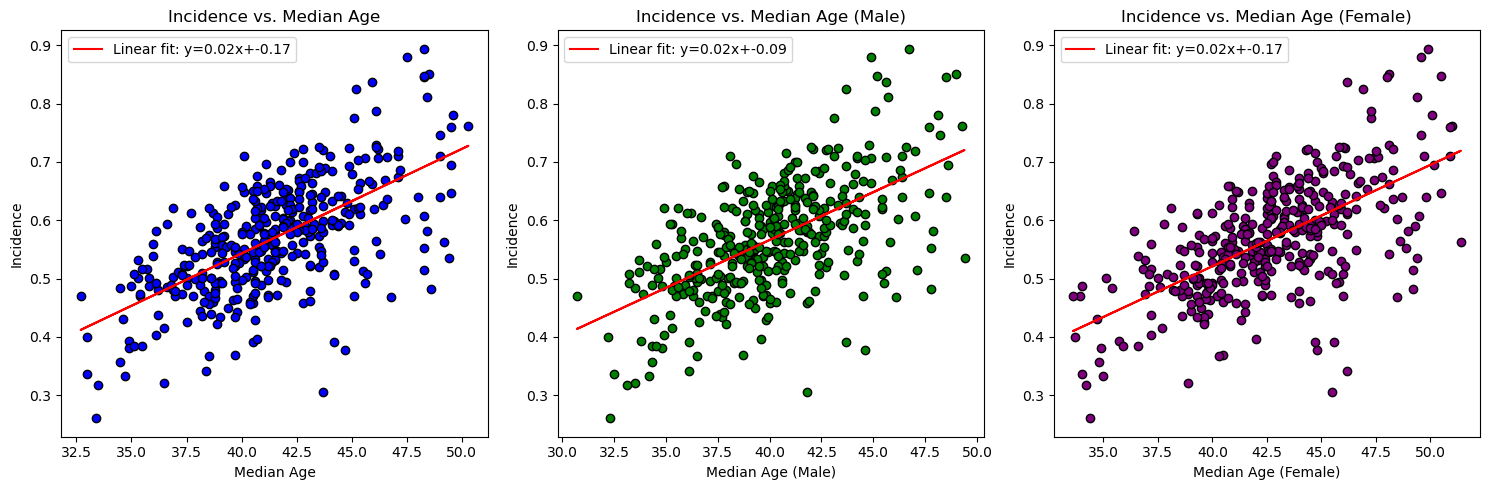

In [15]:

#### Make a three panel plot of incidence against ages

# Create a figure and three subplots (panels)
fig, axs = plot.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns
#
axs[0].scatter(focused_data_clean['medianage'], focused_data_clean['incidence'], marker="o", facecolors="blue", edgecolors="black")
axs[0].plot(x_all, line_all, color='red', label=f'Linear fit: y={slope_all:.2f}x+{intercept_all:.2f}')
axs[0].set_title('Incidence vs. Median Age')
axs[0].set_xlabel('Median Age')
axs[0].set_ylabel('Incidence')
axs[0].legend()
# Second panel - Median age (male)
axs[1].scatter(focused_data_clean['medianagemale'], focused_data_clean['incidence'], marker="o", facecolors="green", edgecolors="black")
axs[1].plot(x_male, line_male, color='red', label=f'Linear fit: y={slope_male:.2f}x+{intercept_male:.2f}')
axs[1].set_title('Incidence vs. Median Age (Male)')
axs[1].set_xlabel('Median Age (Male)')
axs[1].set_ylabel('Incidence')
axs[1].legend()
# Third panel - Median age (female)
axs[2].scatter(focused_data_clean['medianagefemale'], focused_data_clean['incidence'], marker="o", facecolors="purple", edgecolors="black")
axs[2].plot(x_female, line_female, color='red', label=f'Linear fit: y={slope_female:.2f}x+{intercept_female:.2f}')
axs[2].set_title('Incidence vs. Median Age (Female)')
axs[2].set_xlabel('Median Age (Female)')
axs[2].set_ylabel('Incidence')
axs[2].legend()
# Adjust layout
plot.tight_layout()
# Show the plot
# Save the plot figure
plot.savefig('age_incidence.png', format='png', dpi=300)
plot.show()
